In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
blobs, classes = make_blobs(500, centers=3)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

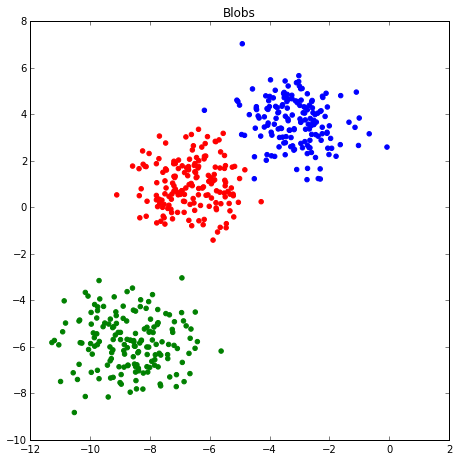

In [7]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
rgb = np.array(['r', 'g', 'b'])
ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[classes])
ax.set_title('Blobs')

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(blobs)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [9]:
kmeans.cluster_centers_

array([[-3.12979654,  3.70842794],
       [-8.6620017 , -5.81939495],
       [-6.62181699,  0.97328685]])

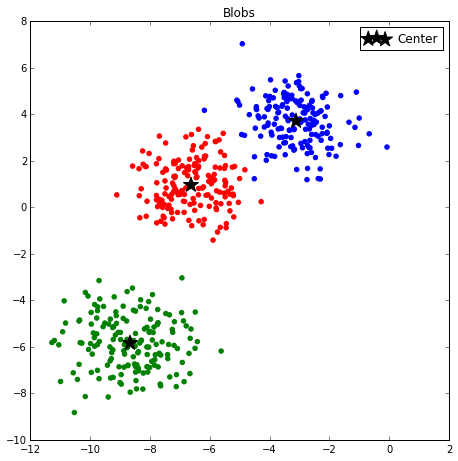

In [11]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[classes])
ax.scatter(kmeans.cluster_centers_[:, 0],
          kmeans.cluster_centers_[:, 1], marker='*', s=250,
          color='black', label='Center')
ax.set_title('Blobs')
ax.legend(loc='best')

In [13]:
kmeans.labels_[:5] # labels_ returns the expected results

array([2, 0, 1, 0, 2], dtype=int32)

In [15]:
# these classes should be the same as the labels_ except with
# the values potentially swapped (in this case 2 and 0)
# the value doesn't matter but that all the assigned values
# are in the same class.
classes[:5]

array([0, 2, 1, 2, 0])

In [18]:
# transform method shows the distance between each point 
# and each centroid
kmeans.transform(blobs)[:5]

array([[  6.05360088,   5.48742522,   1.68793427],
       [  1.15669074,  11.18727508,   5.07090102],
       [ 11.02944851,   1.15315452,   7.39995026],
       [  0.55439017,  11.12022548,   4.74550109],
       [  2.68709988,   9.21078836,   2.13878687]])

In [19]:
# kmeans works by minimizing the within-cluster sum of
# square distance from the mean. It does this by setting
# a pre-specified number of clusters, K, and then alternating
# between assigning each observation to the nearest cluster
# then updating each centroid by calculating the mean of
# each observation assigned to this cluster.